In [1]:
from typing import TypedDict, Literal

from huggingface_hub import grant_access
from langgraph.graph import StateGraph
from IPython.display import display, Image
from loguru import logger

/Users/ashiq/PycharmProjects/AIAgentDevelopment/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
class AgentState(TypedDict):
    message: str

In [ ]:
def greeting_node(state: AgentState) -> AgentState:
    """adds greeting message to agent state"""
    state['message'] = f"Hey {state['message']}, how are you today?"
    return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

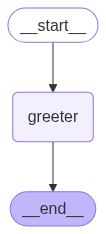

In [9]:
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({"message": "Ashiq"})

In [11]:
result["message"]

'Hey Ashiq, how are you today?'

### Exercise For Graph 1

In [16]:
class AgentState(TypedDict):
    name: str

In [17]:
def compliment_node(state: AgentState) -> AgentState:
    """adds compliment message to agent state"""
    state['name'] = f"{state['name']}, you're doing an amazing job learning LangGraph"
    return state

In [18]:
graph = StateGraph(AgentState)

graph.add_node("compliment", compliment_node)
graph.set_entry_point("compliment")
graph.set_finish_point("compliment")

app = graph.compile()

In [21]:
result = app.invoke({"name": "Ashiq"})
result["name"]

"Ashiq, you're doing an amazing job learning LangGraph"

# Multiple Inputs: Graph 2

In [22]:
from typing import TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [31]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    result: str

In [65]:
def process_values(state: AgentState) -> AgentState:
    """This function process handles multiple different inputs"""
    logger.info(f"before {state}")
    state["result"] = f"Hi there {state['name']}. Your sum is = {sum(state['values'])}"
    logger.debug(f"after {state}")
    return state

In [66]:
graph = StateGraph(AgentState)

graph.add_node("process_values", process_values)
graph.set_entry_point("process_values")
graph.set_finish_point("process_values")

app = graph.compile()

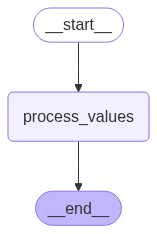

In [55]:
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
result = app.invoke({"values": [1, 2, 3, 4], "name": "Ashiq"})
result

2025-09-07 23:34:40.685 | INFO     | __main__:process_values:3 - before {'name': 'Ashiq', 'values': [1, 2, 3, 4]}
2025-09-07 23:34:40.686 | DEBUG    | __main__:process_values:5 - after {'name': 'Ashiq', 'values': [1, 2, 3, 4], 'result': 'Hi there Ashiq. Your sum is = 10'}


{'name': 'Ashiq',
 'values': [1, 2, 3, 4],
 'result': 'Hi there Ashiq. Your sum is = 10'}

In [68]:
result["result"]

'Hi there Ashiq. Your sum is = 10'

### Exercise for Graph 2

In [43]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    operation: Literal["+", "-", "*", "/"]
    result: str

In [48]:
import math


def calculate_values(state: AgentState) -> AgentState:
    """This function calculates values for a state"""
    logger.info(f"before {state}")
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    else:
        state["result"] = "Invalid!"
        logger.debug(f"after {state}")
    return state

In [49]:
graph = StateGraph(AgentState)

graph.add_node("calculate_values", calculate_values)
graph.set_entry_point("calculate_values")
graph.set_finish_point("calculate_values")

app = graph.compile()

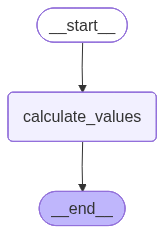

In [50]:
display(Image(app.get_graph().draw_mermaid_png()))

In [52]:
result = app.invoke({"values": [1, 2, 3, 4], "name": "Ashiq", "operation": "*"})
print(result)

2025-09-08 21:02:26.688 | INFO     | __main__:calculate_values:4 - before {'name': 'Ashiq', 'values': [1, 2, 3, 4], 'operation': '*'}


{'name': 'Ashiq', 'values': [1, 2, 3, 4], 'operation': '*', 'result': 'Hi Ashiq, your answer is: 24'}


## Sequential Graph: Graph 3

In [15]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [17]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of our sequence"""
    state['final'] = f"Hi {state['name']}!"
    return state

In [20]:
def second_node(state: AgentState) -> AgentState:
    """This is the second node of our sequence"""
    state['final'] += f" You are {state['age']} years old."
    return state

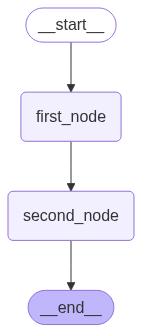

In [25]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()
app

In [26]:
result = app.invoke({"age": "28", "name": "Ashiq"})
print(result)

{'name': 'Ashiq', 'age': '28', 'final': 'Hi Ashiq! You are 28 years old.'}


### Exercise for Graph 3

In [56]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: list[str]
    final: str

In [57]:
def greeting_node(state: AgentState) -> AgentState:
    """welcome a person"""
    state['final'] = f"Hi {state['name']}, Welcome to the system!"
    return state

In [58]:
def age_node(state: AgentState) -> AgentState:
    """describes user age"""
    state['final'] += f" You are {state['age']} years old."
    return state

In [59]:
def skills_node(state: AgentState) -> AgentState:
    """describes user skills"""
    state['final'] += f" You have skills in: {", ".join(state['skills'])}"
    return state

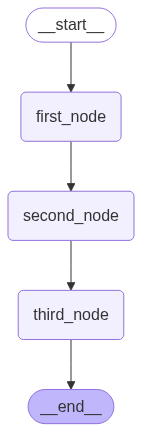

In [60]:
graph = StateGraph(AgentState)

graph.add_node("first_node", greeting_node)
graph.add_node("second_node", age_node)
graph.add_node("third_node", skills_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app = graph.compile()
app

In [61]:
result = app.invoke({"age": "28", "name": "Ashiq", "skills": ["python", "go"]})
print(result)

{'name': 'Ashiq', 'age': '28', 'skills': ['python', 'go'], 'final': 'Hi Ashiq, Welcome to the system! You are 28 years old. You have skills in: python, go'}


## Conditional Graph: Graph 4

In [77]:
from langgraph.graph import StateGraph, START, END

In [78]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    result: int

In [79]:
def adder(state: AgentState) -> AgentState:
    """sum of num1 and num2"""
    state['result'] = state['num1'] + state['num2']
    return state

In [80]:
def subtractor(state: AgentState) -> AgentState:
    """subtraction of num1 and num2"""
    state['result'] = state['num1'] - state['num2']
    return state

In [81]:
def decide_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"

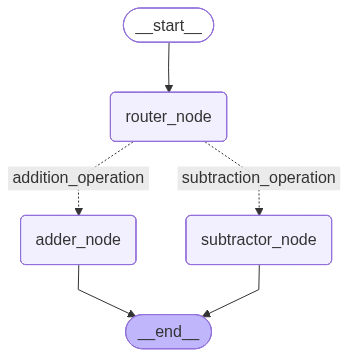

In [82]:
graph = StateGraph(AgentState)

graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", subtractor)
graph.add_node("router_node", lambda state: state)

graph.add_edge(START, "router_node")
graph.add_conditional_edges("router_node", decide_next_node,
                            {"addition_operation": "adder_node", "subtraction_operation": "subtractor_node"})
graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)

app = graph.compile()
app

In [83]:
initial_state_1 = AgentState(num1=10, operation="+", num2=5)
result = app.invoke(initial_state_1)
print(result)

{'num1': 10, 'operation': '+', 'num2': 5, 'result': 15}


### Exercise for Graph 4

In [26]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [33]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    finalNumber1: int
    num3: int
    num4: int
    operation2: str
    finalNumber2: int

In [34]:
def add_node(state:AgentState) -> AgentState:
    """sum of num1 and num2"""
    state['finalNumber1'] = state['num1'] + state['num2']
    return state

def add_node2(state: AgentState) -> AgentState:
    """sum of num3 and num4"""
    state['finalNumber2'] = state['num3'] + state['num4']
    return state

In [35]:
def subtract_node(state: AgentState) -> AgentState:
    """subtraction of num1 and num2"""
    state['finalNumber1'] = state['num1'] - state['num2']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    """subtraction of num3 and num4"""
    state['finalNumber2'] = state['num3'] - state['num4']
    return state

In [36]:
def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation"] == "+":
        print("ADD 1")
        return "addition_operation"

    elif state["operation"] == "-":
        print("SUB 1")
        return "subtraction_operation"

def decide_next_node2(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation2"] == "+":
        print("ADD2")
        return "addition_operation2"

    elif state["operation2"] == "-":
        print("SUB2")
        return "subtraction_operation2"

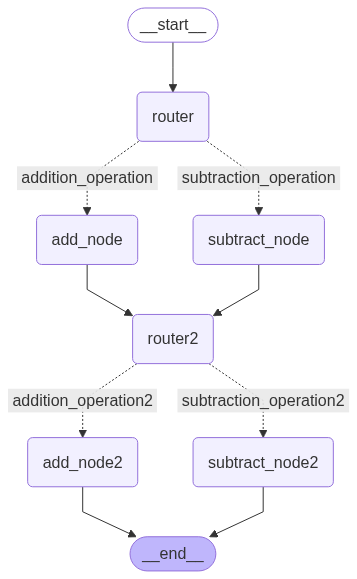

In [37]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)
graph.add_node("router", lambda state: state)
graph.add_node("add_node2", add_node2)
graph.add_node("subtract_node2", subtract_node2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", decide_next_node,
                            {"addition_operation": "add_node", "subtraction_operation": "subtract_node"})

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges("router2", decide_next_node2,
                            {"addition_operation2": "add_node2",
                             "subtraction_operation2": "subtract_node2"})

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()
app

In [38]:
initial_state = AgentState(num1 = 10, operation="-", num2 = 5, num3 = 7, num4=2, operation2="+", finalNumber1= 0, finalNumber2 = 0)
result = app.invoke(initial_state)
print(result)

SUB 1
ADD1
{'num1': 10, 'num2': 5, 'operation': '-', 'finalNumber1': 5, 'num3': 7, 'num4': 2, 'operation2': '+', 'finalNumber2': 9}


### Looping Graph: Graph 5